In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import signal
import os
import glob
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import matplotlib.cm as cm
import pandas as pd
from random import randint


In [2]:
def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
def find_fit_vals(dataX,dataY):
    maxx = max(dataY)
    sig_val = maxx*0.5
    MeanLoc = np.where(dataY==max(dataY))[0][0]
    Mean = dataX[MeanLoc]
    L = dataY[0:MeanLoc]
    R = dataY[MeanLoc:len(dataY)]
    LP =find_nearest(L,sig_val)
    RP =find_nearest(R,sig_val)
    whereL = np.where(L==LP)[0][0]
    whereR = np.where(R==RP)[0][0]
    Lpoint = dataX[whereL]
    Rpoint = dataX[MeanLoc+whereR]
    sigma_point = (Rpoint-Lpoint)/2   
    return (Mean,sigma_point)

In [3]:
Number = 1000
val = np.zeros(Number)
rad = np.random.normal(0.5, .01, Number)

In [4]:
hist, bin_edges = np.histogram(rad , 20)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

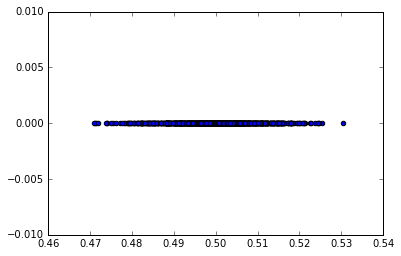

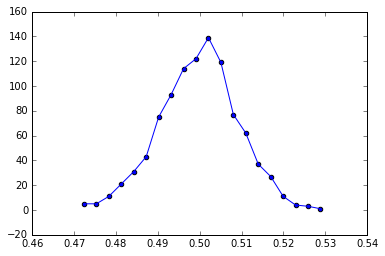

In [5]:

plt.scatter(rad,val)
plt.show()
plt.plot(bin_centres,hist)
plt.scatter(bin_centres,hist)
plt.show()

In [6]:
x = bin_centres
y = hist
aa = find_fit_vals(x,y)
popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), aa[0], aa[1]])
popt

array([  1.29485029e+02,   5.00085931e-01,   9.06146916e-03])

In [9]:
K = 9e9
Q = 1.6e-19
m = 9.109e-31
dt = 1e-6
times = int(1.5e1)
newval = np.zeros(len(rad))
for w in range(0,times):
    rad += newval
    newval = []
    for q in range(0,len(rad)):
        F = 0
        for particle in rad:
            if rad[q] > particle:
                r = rad[q] - particle
                F += 1/(r**2)
            elif rad[q] < particle:
                r = rad[q] - particle
                F += -1/(r**2)
            else:
                None
        dD = ((K*(Q*dt)**2)/m)* F
        newval.append(dD)
    newval = np.array(newval)            
            
            
            

In [11]:
len(newval)

1000

In [ ]:
tt =rad[rad>0] 
tt = tt[tt<1]
plt.hist(tt,15)
plt.show()

In [78]:
radO

array([ 0.51137541,  1.19606201, -0.02395367,  1.36896454,  0.05371694,
        0.70175244,  0.79168939,  0.12233589,  0.21949045,  0.63673958])

In [51]:
hist, bin_edges = np.histogram(tt , 20)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

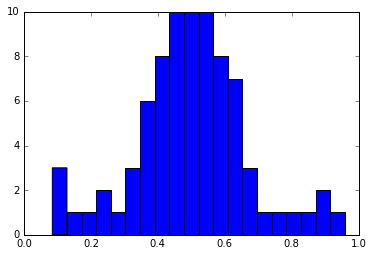

In [50]:
plt.hist(tt, bins=20)
plt.show()

In [52]:
x = bin_centres
y = hist
aa = find_fit_vals(x,y)
popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), aa[0], aa[1]])

In [53]:
popt

array([ 10.47776307,   0.50164162,   0.12005467])

In [ ]:
K = 1#9e9
Q = 1#1.6e-19
m = 1
dt = 1
newval = 9
for q in range(0,len(rad)):
    F = 0
    for particle in rad:
        if rad[q] > particle:
            r = rad[q] - particle
            F += 1/(r**2)
        elif rad[q] < particle:
            r = rad[q] - particle
            F += -1/(r**2)
        else:
            None
    dD = ((K*(Q*dt)**2)/m)* F
    newval.append(dD)
newval = np.array(newval)            
            
            
            